In [ ]:

# Create an "Academic Performance" dataset of students and perform the following operations using Python.  
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons:
# to change the scale for better understanding of the variable,
# to convert a non-linear relation into a linear one, or
# to decrease the skewness and
# convert the distribution into a normal distribution. 
# Reason and document your approach properly.

In [22]:

import pandas as pd
import numpy as np

In [23]:
data = {
    'Firstname': ['LA', 'SA', 'AB', 'DA', 'SA', 'WS', 'DY', 'JK', 'RT', 'UV', 'MN', 'BC'],
    'Lastname': ['Roy', 'Dixit', 'Danial', 'Kapoor', 'Jha', 'Thakur', 'Kapoor', 'Khanna', 'Pardesi', 'Pardesi', 'Desai', 'Patel'],
    'Gender': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F'],
    'SPOS': [85.0, 90.0, np.nan, 95.0, np.nan, 87.0, 81.0, 40.0, 10.0, 9.0, 200.0, 300.0],
    'DSBDA': [88, 90, 'na', 86, 84, np.nan, 80, 88, 96, np.nan, 87, np.nan],
    'WT': [90.0, 94.0, 100.0, 500.0, 98.0, 97.0, 96.0, 95.0, 94.0, 93.0, np.nan, 88.0],
    'DA': [92, 95, 80, 82, 84, 86, 89, 87, 88, 96, 'N.A', 300]
}
df=pd.DataFrame(data)

In [24]:
df
#print first few rows

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88,90.0,92
1,SA,Dixit,F,90.0,90,94.0,95
2,AB,Danial,M,NaN,na,100.0,80
3,DA,Kapoor,M,95.0,86,500.0,82
4,SA,Jha,F,NaN,84,98.0,84
5,WS,Thakur,F,87.0,NaN,97.0,86
6,DY,Kapoor,M,81.0,80,96.0,89
7,JK,Khanna,F,40.0,88,95.0,87
8,RT,Pardesi,M,10.0,96,94.0,88
9,UV,Pardesi,M,9.0,NaN,93.0,96


In [25]:
missing_value_format = ["na" , "NaN" , "?" , "NA" , "--" , "n/a" , "n.a."]

In [26]:
df.replace(missing_value_format, np.nan, inplace=True)
df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
2,AB,Danial,M,NaN,NaN,100.0,80
3,DA,Kapoor,M,95.0,86.0,500.0,82
4,SA,Jha,F,NaN,84.0,98.0,84
5,WS,Thakur,F,87.0,NaN,97.0,86
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87
8,RT,Pardesi,M,10.0,96.0,94.0,88
9,UV,Pardesi,M,9.0,NaN,93.0,96


In [27]:
print(df['SPOS'].head(10))
#print gender column

0    85.0
1    90.0
2     NaN
3    95.0
4     NaN
5    87.0
6    81.0
7    40.0
8    10.0
9     9.0
Name: SPOS, dtype: float64


In [28]:
print(df['SPOS'].isnull().head(10))
#print null values

0    False
1    False
2     True
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: SPOS, dtype: bool


In [29]:
print(df['SPOS'].notnull().head(10))
#print not null values

0     True
1     True
2    False
3     True
4    False
5     True
6     True
7     True
8     True
9     True
Name: SPOS, dtype: bool


In [30]:
print(df.isnull().values.any())
#check if any value of the given data set is null

True


In [31]:
#REMOVING ROWS WITH NULL VALUES ...........axis=0 (row) .........axis=1(column)

In [32]:
#drop all rows with atleast one null value
new_df2 = df.dropna(axis=0 , how='any')
new_df2

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
3,DA,Kapoor,M,95.0,86.0,500.0,82
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87
8,RT,Pardesi,M,10.0,96.0,94.0,88


In [33]:
#drop all columns with atleast one null value
new_df4 = df.dropna(axis=1 , how='any')
new_df4

,Firstname,Lastname,Gender,DA
0,LA,Roy,M,92
1,SA,Dixit,F,95
2,AB,Danial,M,80
3,DA,Kapoor,M,82
4,SA,Jha,F,84
5,WS,Thakur,F,86
6,DY,Kapoor,M,89
7,JK,Khanna,F,87
8,RT,Pardesi,M,88
9,UV,Pardesi,M,96


In [34]:
#INPUT Missing values in our dataset

# A single pre-decided constant value, such as 0.
# Taking value from another randomly selected sample.
# Mean, median, or mode for the column.

In [35]:
# Single Constant Value :
df['SPOS'].fillna(0,inplace=True)
df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
2,AB,Danial,M,0.0,NaN,100.0,80
3,DA,Kapoor,M,95.0,86.0,500.0,82
4,SA,Jha,F,0.0,84.0,98.0,84
5,WS,Thakur,F,87.0,NaN,97.0,86
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87
8,RT,Pardesi,M,10.0,96.0,94.0,88
9,UV,Pardesi,M,9.0,NaN,93.0,96


In [36]:
#Val from prev row :
#pad method is used for taking values from prev row
df['DSBDA'].fillna(method='pad',inplace=True)
df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
2,AB,Danial,M,0.0,90.0,100.0,80
3,DA,Kapoor,M,95.0,86.0,500.0,82
4,SA,Jha,F,0.0,84.0,98.0,84
5,WS,Thakur,F,87.0,84.0,97.0,86
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87
8,RT,Pardesi,M,10.0,96.0,94.0,88
9,UV,Pardesi,M,9.0,96.0,93.0,96


In [37]:
#Val from next row
#bfill is used for taking values from next row
df['WT'].fillna(method='bfill' , inplace = True)
df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
2,AB,Danial,M,0.0,90.0,100.0,80
3,DA,Kapoor,M,95.0,86.0,500.0,82
4,SA,Jha,F,0.0,84.0,98.0,84
5,WS,Thakur,F,87.0,84.0,97.0,86
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87
8,RT,Pardesi,M,10.0,96.0,94.0,88
9,UV,Pardesi,M,9.0,96.0,93.0,96


In [38]:
#OUTLIERS 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


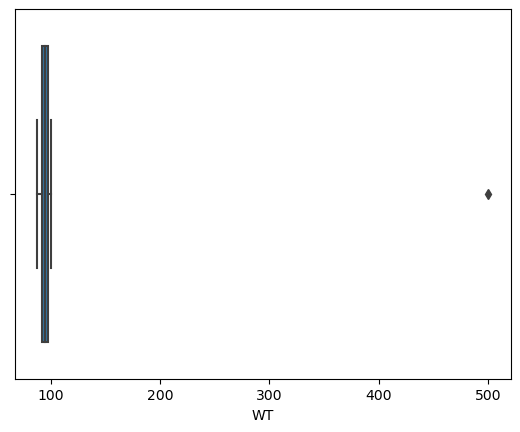

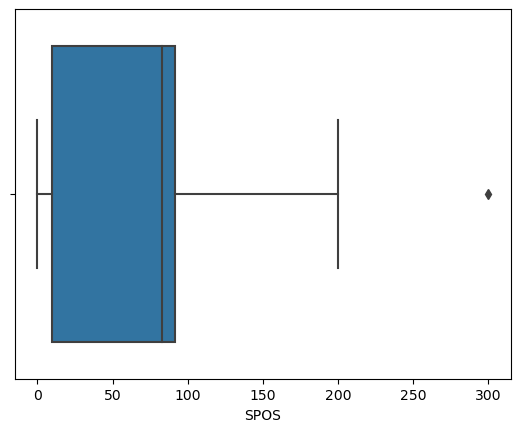

In [43]:
# Box plot
sns.boxplot(x=df['WT'])
plt.show()

# Scatter plot
sns.boxplot(x=df['SPOS'])
plt.show()

In [20]:
df['SPOS'] = np.where((df['SPOS'] > 100), df['SPOS'].median(), df['SPOS'])
df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
2,AB,Danial,M,0.0,90.0,100.0,80
3,DA,Kapoor,M,95.0,86.0,500.0,82
4,SA,Jha,F,0.0,84.0,98.0,84
5,WS,Thakur,F,87.0,84.0,97.0,86
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87
8,RT,Pardesi,M,10.0,96.0,94.0,88
9,UV,Pardesi,M,9.0,96.0,93.0,96


In [40]:
#CHANGE SCALE 
#Change Scale for Better Understanding: The log transformation can compress the scale of the variable
# making it easier to visualize and interpret, especially when the variable spans a wide range of values.

In [44]:
df['DSBDA'] = np.log1p(df['DSBDA'])

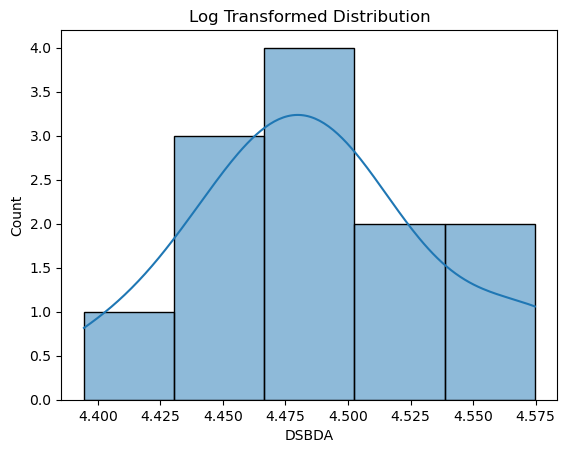

In [46]:
sns.histplot(df['DSBDA'], kde=True)
plt.title('Log Transformed Distribution')
plt.show()